# Viscosity Coefficients

## Prelude
In this notebook we will calculate the viscosity of the Yukawa OCP.

The YAML input file can be found at [input_file](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/YOCP/input_files/yocp_transport.yaml) and this notebook at [notebook](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/YOCP/YOCP_Transport_NB.ipynb).


In [49]:
# Import the usual libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
plt.style.use('MSUstyle')

# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess


# Create the file path to the YAML input file
input_file_name = os.path.join('input_files', 'yocp_transport.yaml')

In [50]:
# pre = PreProcess(input_file_name)
# pre.setup(read_yaml=True)
# pre.run(loops=150)

In [52]:
sim = Simulation(input_file_name)
sim.setup(read_yaml=True)
sim.run()










 _______  _______  _______  _        _______  _______ 
(  ____ \(  ___  )(  ____ )| \    /\(  ___  )(  ____ \
| (    \/| (   ) || (    )||  \  / /| (   ) || (    \/
| (_____ | (___) || (____)||  (_/ / | (___) || (_____ 
(_____  )|  ___  ||     __)|   _ (  |  ___  |(_____  )
      ) || (   ) || (\ (   |  ( \ \ | (   ) |      ) |
/\____) || )   ( || ) \ \__|  /  \ \| )   ( |/\____) |
\_______)|/     \||/   \__/|_/    \/|/     \|\_______)
                                                      


An open-source pure-python molecular dynamics suite for non-ideal plasmas.




********************************************************************************
                                   Simulation                                   
********************************************************************************

Job ID: Al_transport
Job directory: SarkasSimulations/Al_transport
Simulation directory: 
SarkasSimulations/Al_transport/Simulation

Equilibration dumps directory: 
Sarkas

  0%|          | 0/2000 [00:00<?, ?it/s]


Equilibration Time: 0 hrs 0 min 31 sec


------------------------------Production------------------------------ 



  0%|          | 0/200000 [00:00<?, ?it/s]


Production Time: 0 hrs 53 min 36 sec

Total Time: 0 hrs 54 min 8 sec


========================= Filesize Estimates =========================

Equilibration:
	Checkpoint filesize: 0 GB 35 MB 646 KB 624 bytes
	Checkpoint folder size: 0 GB 35 MB 646 KB 624 bytes
Production:
	Checkpoint filesize: 3 GB 415 MB 730 KB 160 bytes
	Checkpoint folder size: 3 GB 415 MB 730 KB 160 bytes

Total occupied space: 3 GB 451 MB 352 KB 784 bytes


In [53]:
postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)
# postproc.parameters.verbose = True










 ____                     __                         
/\  _`\                  /\ \                        
\ \,\L\_\     __     _ __\ \ \/'\      __      ____  
 \/_\__ \   /'__`\  /\`'__\ \ , <    /'__`\   /',__\ 
   /\ \L\ \/\ \L\.\_\ \ \/ \ \ \\`\ /\ \L\.\_/\__, `\
   \ `\____\ \__/.\_\\ \_\  \ \_\ \_\ \__/.\_\/\____/
    \/_____/\/__/\/_/ \/_/   \/_/\/_/\/__/\/_/\/___/ 
                                                     
                                                     


An open-source pure-python molecular dynamics suite for non-ideal plasmas.




********************************************************************************
                                 Postprocessing                                 
********************************************************************************

Job ID: Al_transport
Job directory: SarkasSimulations/Al_transport
PostProcessing directory: 
SarkasSimulations/Al_transport/PostProcessing

Equilibration dumps directory: 
SarkasS

In [54]:
from sarkas.tools.observables import Thermodynamics, PressureTensor, HeatFlux, RadialDistributionFunction, VelocityAutoCorrelationFunction



=========================== Thermodynamics ===========================
Data saved in: 
 SarkasSimulations/Al_transport/PostProcessing/Thermodynamics/Production/Thermodynamics_Al_transport.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of blocks = 1
No. dumps per block = 10001
Total time per block: T = 3.3651e-11 [s] ~ 1000 plasma periods
Time interval: dt = 3.3651e-15 [s] ~ 1.0e-01 plasma period



Thermodynamics calculation Time: 0 sec 57 msec 605 usec 583 nsec


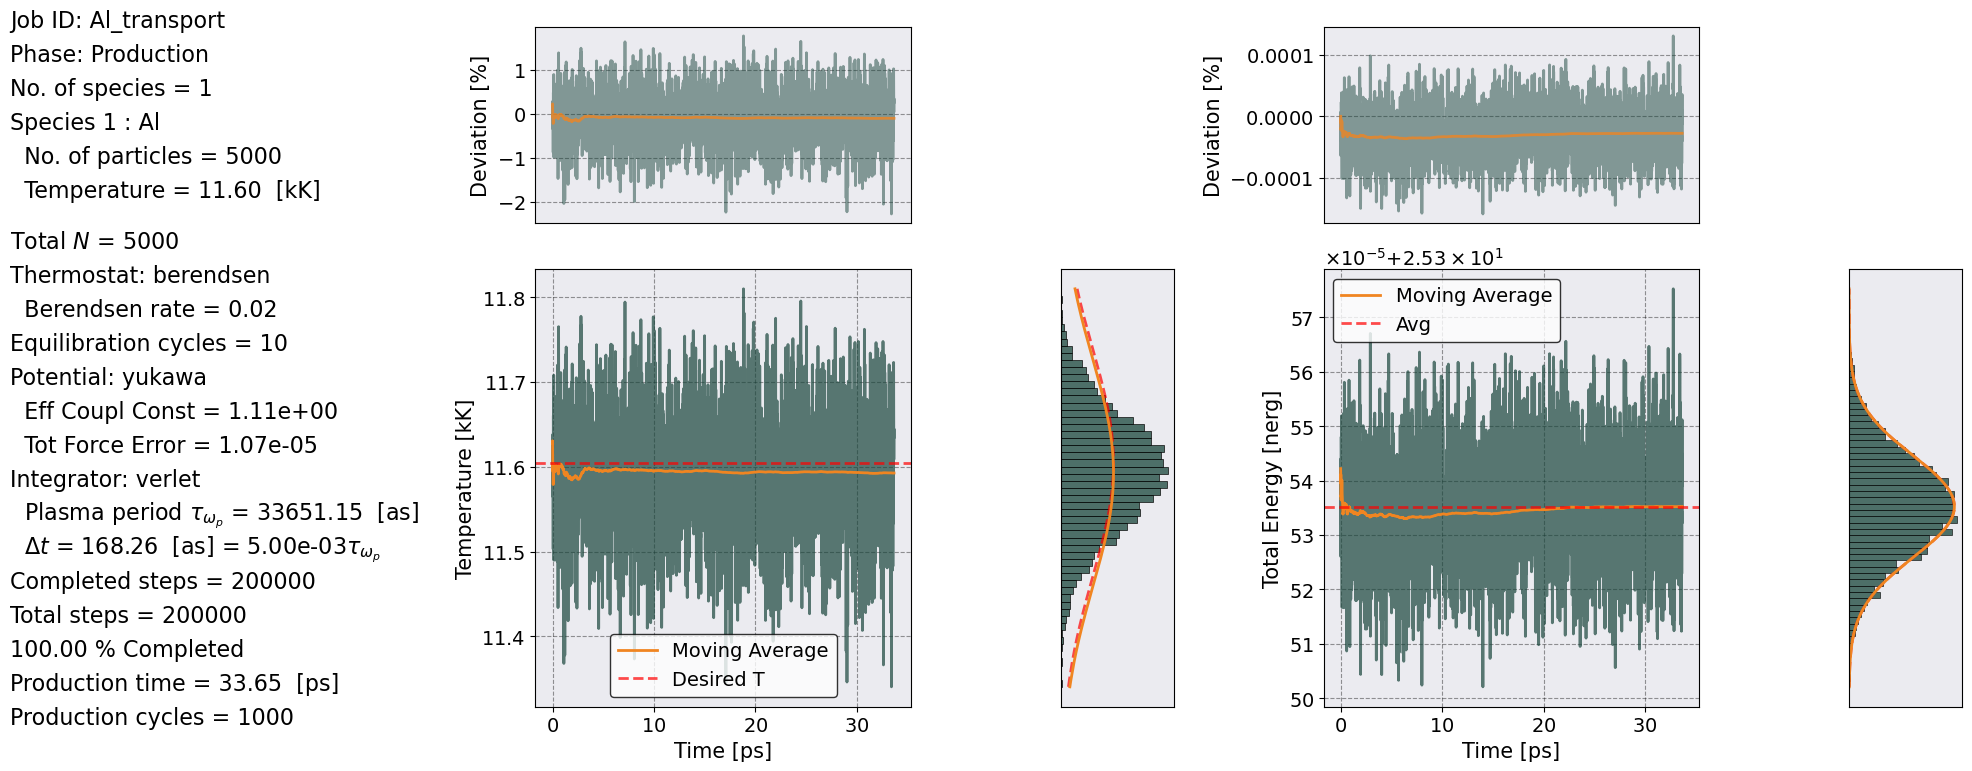

In [55]:
therm = Thermodynamics()
therm.setup(postproc.parameters, independent_slices=True, no_slices=1)
therm.compute()
# therm.grab_sim_data()
therm.temp_energy_plot(postproc)

## Pair Distribution Function

The first observable to calculate is always the RDF.

In [56]:
rdf = RadialDistributionFunction()
rdf.setup(postproc.parameters)
rdf.compute()




==================== Radial Distribution Function ====================
Data saved in: 
 SarkasSimulations/Al_transport/PostProcessing/RadialDistributionFunction/Production/RadialDistributionFunction_Al_transport.h5
Data accessible via: self.dataframe_slices, self.dataframe
No. bins = 500
dr = 0.0080 a_ws = 1.2730e-10 [cm]
Maximum Distance (i.e. potential.rc)= 4.0235 a_ws = 6.3651e-08 [cm]
Time Series Data:
No. of blocks = 1
No. dumps per block = 10001
Total time per block: T = 3.3651e-11 [s] ~ 1000 plasma periods
Time interval: dt = 3.3651e-15 [s] ~ 1.0e-01 plasma period


Calculating RDF for slice:   0%|          | 0/1 [00:00<?, ?it/s]

first dump_end 10000

Radial Distribution Function Calculation Time: 0 sec 34 msec 220 usec 500 nsec


<Axes: xlabel='$r /a$'>

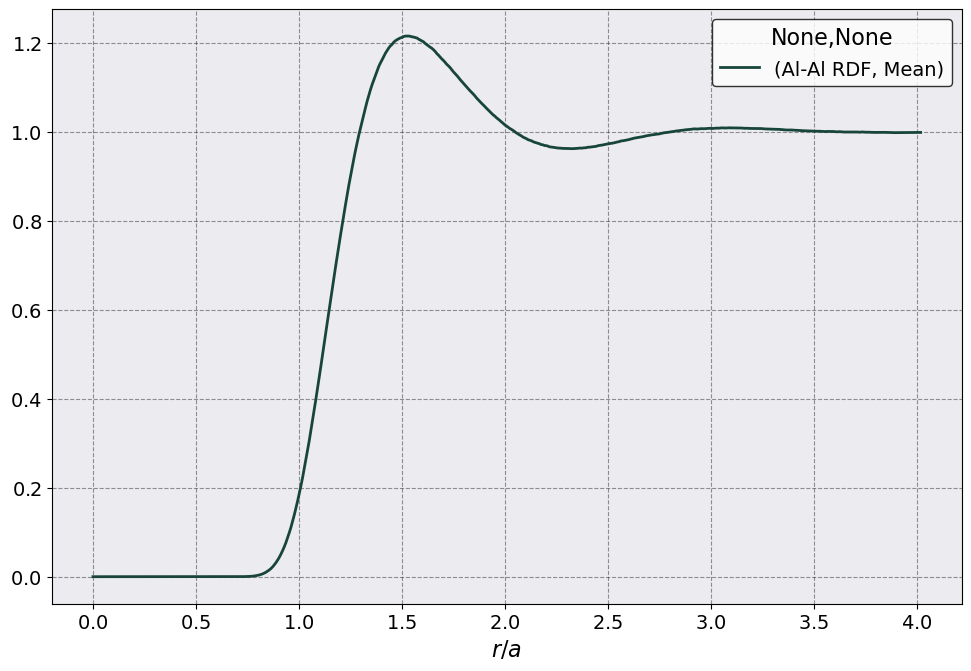

In [57]:
rdf.plot(scaling = rdf.a_ws, 
         y = ('Al-Al RDF', 'Mean'),
         xlabel = r'$r /a$')

## Pressure Tensor

The viscosity is obtained from the autocorrelation function of the Pressure Tensor $\overleftrightarrow{\mathcal P}$ whose elements are

\begin{equation}
\mathcal P_{\alpha\gamma}(t) = \frac{1}{V} \sum_{i}^{N} \left [ m_i v^{\alpha}_{i} v^{\gamma}_{i} -  \sum_{j > i} \frac{r_{ij}^{\alpha} r_{ij}^{\gamma} }{r_{ij}} \frac{d}{dr}\phi(r) \right ],
\end{equation}

where $r_{ij}^{\alpha}$ is the $\alpha$ component of the distance between particles $i$ and $j$. The first term is the kinetic term and the second term is the virial term, but it is often referred to as the potential contribution. The virial is calculated during the simulation phase and saved together with particles corrdinates. 

In order to check that our code are correct, let's verify some laws. 

The pressure of the system is calculated from $\mathcal P(t)= \frac1{3} {\rm Tr} \overleftrightarrow{\mathcal P}(t)$ and also from 

\begin{equation}
P = \frac{n}{\beta} - \frac{2\pi}{3} n^2 \int_0^{\infty} dr \, r^3 \frac{d\phi(r)}{dr} g(r)
\end{equation}

where $g(r)$ is the pair distribution function that we have already calculated.

Let's calculate the Pressure tensor and the pressure $\mathcal P$.

In [58]:
pt = PressureTensor()
pt.setup(postproc.parameters, independent_slices=True, no_slices= 1)
pt.compute()



========================== Pressure Tensor ===========================
Data saved in: 
 SarkasSimulations/Al_transport/PostProcessing/PressureTensor/Production/PressureTensor_Al_transport.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of blocks = 1
No. dumps per block = 10001
Total time per block: T = 3.3651e-11 [s] ~ 1000 plasma periods
Time interval: dt = 3.3651e-15 [s] ~ 1.0e-01 plasma period

Data file not found! 
 SarkasSimulations/Al_transport/PostProcessing/PressureTensor/Production/PressureTensor_Al_transport_raw.h5



Calculating Pressure Tensor for slice :   0%|          | 0/1 [00:00<?, ?it/s]


Pressure Tensor calculation Time: 1 sec 519 msec 654 usec 917 nsec


As usual the data is saved in several dataframes. In this case we have 4 dataframes

* A dataframe for the values of each of the elements of the pressure tensor for each of the slices, `pt.dataframe_slices`
* A dataframe for the mean and std values of each of the elements of the pressure tensor, `pt.dataframe`
* A dataframe for the ACF of each pair $\langle \mathcal P_{\alpha\beta}(t)\mathcal P_{\mu\nu}(0) \rangle$ for each slice, `pt.dataframe_acf_slices`
* A dataframe for the mean and std of the ACF of each pair $\langle \mathcal P_{\alpha\beta}(t)\mathcal P_{\mu\nu}(0) \rangle$, `pt.dataframe_acf`

Let's look at `pt.dataframe` and at its columns

Note that the Pressure $\mathcal P(t)$ is readily calculated and provided as a column of the dataframe.

Note also that there is a multitude of columns. This is because in dense plasmas it is useful to know the contribution of both the kinetic term and potential term separately, as such the columns of each dataframe contain the kinetic, the potential, and the total value of each $\mathcal P_{\alpha\beta}$ and their ACFs.

Let's plot the Pressure as a function of time

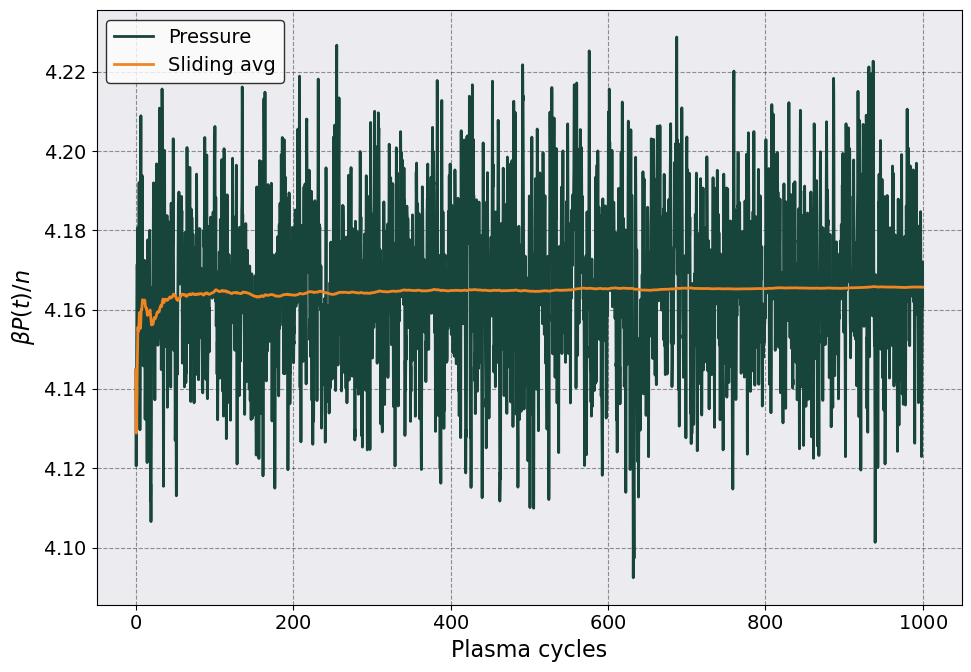

In [59]:
# Let's plot it
t_wp = 2.0*np.pi/therm.total_plasma_frequency

p_id = pt.total_num_density / therm.beta_slices.mean()
ax = pt.plot( 
    scaling = (t_wp, p_id),
    y = ("Total","Pressure", "Mean"),
    xlabel = "Plasma cycles",
    ylabel = r"$ \beta P(t)/n$"
       )
ax.plot(pt.dataframe[("Total", "Quantity", 'Time')]/t_wp, pt.dataframe[("Total",'Pressure','Mean')].expanding().mean()/p_id )
ax.legend(['Pressure', 'Sliding avg'])

In [60]:
from sarkas.tools.observables import make_gaussian_plot

In [61]:
pt.dataframe.columns

MultiIndex([('Total',           'Quantity', 'Time'),
            ('Total',           'Pressure', 'Mean'),
            ('Total',           'Pressure',  'Std'),
            ('Total', 'Pressure Tensor XX', 'Mean'),
            ('Total', 'Pressure Tensor XX',  'Std'),
            ('Total', 'Pressure Tensor XY', 'Mean'),
            ('Total', 'Pressure Tensor XY',  'Std'),
            ('Total', 'Pressure Tensor XZ', 'Mean'),
            ('Total', 'Pressure Tensor XZ',  'Std'),
            ('Total', 'Pressure Tensor YY', 'Mean'),
            ('Total', 'Pressure Tensor YY',  'Std'),
            ('Total', 'Pressure Tensor YZ', 'Mean'),
            ('Total', 'Pressure Tensor YZ',  'Std'),
            ('Total', 'Pressure Tensor ZZ', 'Mean'),
            ('Total', 'Pressure Tensor ZZ',  'Std')],
           )

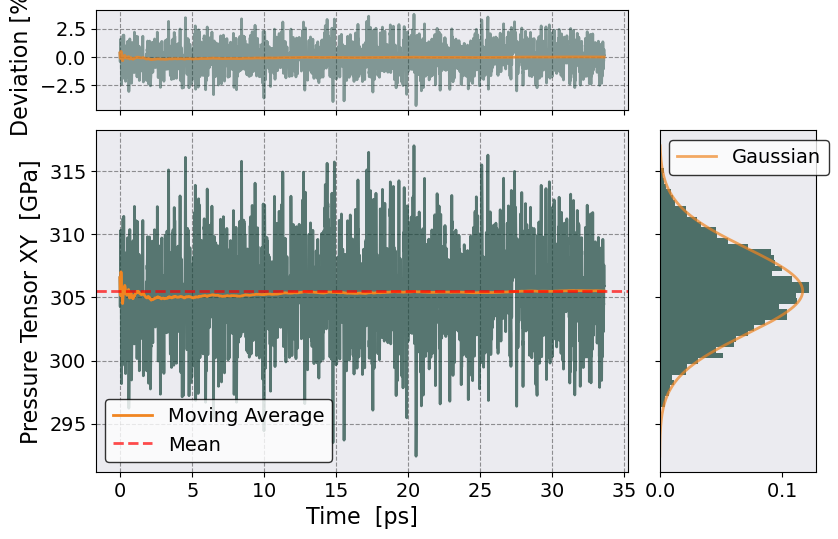

In [63]:
_ = make_gaussian_plot(pt.dataframe[("Total", "Quantity", 'Time')],
                       pt.dataframe[("Total",'Pressure Tensor XY','Mean')],
                       "Pressure Tensor XY", "mks")

## Pressure from RDF

Let's now calculate the pressure from the integral of the RDF. This is obtained from the method `compute_from_rdf` of the `Thermodynamics` object. 

Looking at the documentation of this [method](../../api/tools_subpckg/Thermodynamics_methods/sarkas.tools.observables.Thermodynamics.compute_from_rdf.rst) we notice that it returns five values:
the Hartree and correlational terms between species :math:`A` and :math:`B` and the ideal pressure $n k_B T$. 

The total pressure is given from the sum of the three terms and should be equal to the 

$$ P = n k_BT + P_{\rm Hartree} + P_{\rm Corr} = {\operatorname {Mean} } \left \{ \mathcal P(t) \right \} $$

In [64]:
nkT, _, _, p_h, p_c = therm.compute_from_rdf(rdf, postproc.potential)

P_rdf = nkT + p_h + p_c
P_trace = pt.dataframe[("Total","Pressure", "Mean")].mean()

print("The relative difference between the two methods is = {:.2f} %".format((P_rdf[0] - P_trace)*100/P_rdf[0] ) )

The relative difference between the two methods is = 0.03 %


It seems that we have done a good job! 

### Sum rule

Let's now check that we have calculated the ACF correctly. The equal time ACFs of the elements of $\overleftrightarrow{\mathcal P}(t)$ obey the following sum rules

$$
\mathcal J_{zzzz}(0) = \frac 13 \sum_{\alpha}\left \langle \mathcal P_{\alpha\alpha}(0)\mathcal P_{\alpha\alpha}(0) \right \rangle  =  \frac{n}{\beta^2} \left [ 3 + \frac{2\beta}{15} I_1 + \frac \beta5 I_2 \right ] ,
$$ 
$$
\mathcal J_{zzxx}(0) = \frac 16 \sum_{\alpha} \sum_{\beta\neq\alpha} \left \langle \mathcal P_{\alpha\alpha}(0)\mathcal P_{\beta\beta}(0) \right \rangle = \frac{n}{\beta^2} \left [ 1 - \frac{2\beta}{5} I_1 + \frac \beta{15} I_2 \right ] ,
$$ 
$$
\mathcal J_{xyxy}(0) = \frac 16 \sum_{\alpha}\sum_{\beta \neq \alpha} \left \langle \mathcal P_{\alpha\beta}(0)\mathcal P_{\alpha\beta}(0) \right \rangle = \frac{n}{\beta^2} \left [ 1 + \frac{4\beta}{15} I_1 + \frac \beta{15} I_2 \right ] ,
$$ 

where

$$ 
I_1 = 2\pi n \int dr \, g(r) r^3 \frac{d\phi}{dr}, \quad I_2 = 2\pi n \int dr\, g(r) r^4 \frac{d^2\phi}{dr^2}.
$$

Notice that all three equal time ACF satisfy 

$$ \mathcal J_{zzzz}(0) - \mathcal J_{zzxx}(0) = 2 \mathcal J_{xyxy}(0) .$$

Let's look at the dataframe of the ACF first

In [65]:
pt.compute_acf()


Calculating Pressure Tensor for slice :   0%|          | 0/1 [00:00<?, ?it/s]


Pressure Tensor ACF calculation Time: 0 sec 121 msec 155 usec 666 nsec


Notice that in this case we have many more columns since now we have the ACF of the kinetic-kinetic, kinetic-potential, potential-kinetic, potential-potential, and the total ACF of each pair of elements.

Let's verify the sum rules.

In [66]:
pt.dataframe_acf

Quantity Pressure Bulk ACF     Pressure Tensor ACF XXXX      \
               Time              Mean Std                     Mean Std   
0      0.000000e+00      3.516400e+18 NaN             1.121362e+19 NaN   
1      3.365115e-15      3.368199e+18 NaN             1.082716e+19 NaN   
2      6.730230e-15      2.969440e+18 NaN             9.770056e+18 NaN   
3      1.009534e-14      2.430328e+18 NaN             8.293900e+18 NaN   
4      1.346046e-14      1.868194e+18 NaN             6.675442e+18 NaN   
...             ...               ...  ..                      ...  ..   
9996   3.363769e-11     -2.804483e+17 NaN            -4.882899e+18 NaN   
9997   3.364105e-11     -9.638151e+14 NaN            -3.227670e+18 NaN   
9998   3.364442e-11      4.262569e+17 NaN            -1.490653e+18 NaN   
9999   3.364778e-11      7.973663e+17 NaN            -1.387570e+17 NaN   
10000  3.365115e-11      9.499874e+17 NaN             5.527081e+17 NaN   

      Pressure Tensor ACF XXXY     Pressure Tensor ACF XXXZ      \
                          Mean Std                     Mean Std   
0                 1.404558e+18 NaN             1.401178e+18 NaN   
1                 1.457758e+18 NaN             1.302712e+18 NaN   
2                 1.390031e+18 NaN             1.101921e+18 NaN   
3                 1.246419e+18 NaN             8.520313e+17 NaN   
4                 1.079756e+18 NaN             6.069282e+17 NaN   
...                        ...  ..                      ...  ..   
9996              3.540786e+15 NaN            -9.329691e+18 NaN   
9997              6.503485e+17 NaN            -1.227489e+19 NaN   
9998              1.135079e+18 NaN            -1.292432e+19 NaN   
9999              1.328306e+18 NaN            -1.114762e+19 NaN   
10000             1.172332e+18 NaN            -7.596373e+18 NaN   

      Pressure Tensor ACF XXYY  ... Pressure Tensor ACF YYYZ      \
                          Mean  ...                     Mean Std   
0                -3.891845e+17  ...             1.046786e+18 NaN   
1                -3.169008e+17  ...             1.041367e+18 NaN   
2                -2.997031e+17  ...             9.126123e+17 NaN   
3                -3.057241e+17  ...             7.118349e+17 NaN   
4                -3.024304e+17  ...             4.995689e+17 NaN   
...                        ...  ...                      ...  ..   
9996             -3.191718e+18  ...             2.158785e+19 NaN   
9997             -3.818552e+18  ...             2.669654e+19 NaN   
9998             -3.985158e+18  ...             3.045806e+19 NaN   
9999             -3.578206e+18  ...             3.142816e+19 NaN   
10000            -2.616072e+18  ...             2.922032e+19 NaN   

      Pressure Tensor ACF YYZZ     Pressure Tensor ACF YZYZ      \
                          Mean Std                     Mean Std   
0                -7.804980e+17 NaN             1.134623e+19 NaN   
1                -7.665951e+17 NaN             1.091104e+19 NaN   
2                -8.076868e+17 NaN             9.736465e+18 NaN   
3                -8.645961e+17 NaN             8.130473e+18 NaN   
4                -8.966865e+17 NaN             6.424662e+18 NaN   
...                        ...  ..                      ...  ..   
9996              1.937201e+19 NaN             8.946600e+18 NaN   
9997              2.216996e+19 NaN             1.368875e+19 NaN   
9998              2.352910e+19 NaN             1.866721e+19 NaN   
9999              2.261596e+19 NaN             2.212176e+19 NaN   
10000             1.943115e+19 NaN             2.256467e+19 NaN   

      Pressure Tensor ACF YZZZ     Pressure Tensor ACF ZZZZ      
                          Mean Std                     Mean Std  
0                 8.785711e+18 NaN             1.104689e+19 NaN  
1                 8.422263e+18 NaN             1.067172e+19 NaN  
2                 7.456828e+18 NaN             9.650975e+18 NaN  
3                 6.141745e+18 NaN             8.238398e+18 NaN  
4                 4.749

The isotropy condition : (J_zzzz_0 - J_zzxx_0 )/( 2*J_xyxy_0 ) = 0.5093


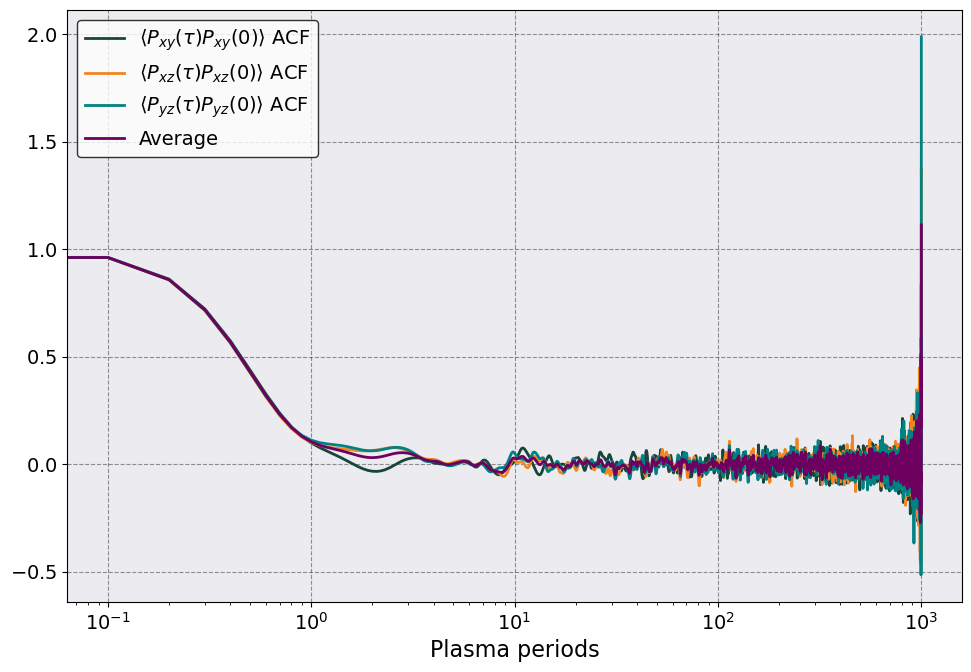

In [67]:
        
# Diagonal terms
column_zzzz = [
    ('Pressure Tensor ACF XXXX', 'Mean'),
    ('Pressure Tensor ACF YYYY', 'Mean'),
    ('Pressure Tensor ACF ZZZZ', 'Mean'),
]
J_zzzz_0 = pt.dataframe_acf[column_zzzz].iloc[0].mean()
    
# Cross-Diagonal Terms
column_zzxx = [
    ('Pressure Tensor ACF XXYY', 'Mean'),
    ('Pressure Tensor ACF XXZZ', 'Mean'),
    ('Pressure Tensor ACF YYZZ', 'Mean')
]
J_zzxx_0 = pt.dataframe_acf[column_zzxx].iloc[0].mean()
    
# Cross Off Diagonal terms
column_xyxy = [
    ('Pressure Tensor ACF XYXY', 'Mean'),
    ('Pressure Tensor ACF XZXZ', 'Mean'),
    ('Pressure Tensor ACF YZYZ', 'Mean')
]
J_xyxy_0 = pt.dataframe_acf[column_xyxy].iloc[0].mean()

# The units of J's are [Density *  Energy]^2
condition = (J_zzzz_0 - J_zzxx_0)/(2.0 * J_xyxy_0)
msg = f'The isotropy condition : (J_zzzz_0 - J_zzxx_0 )/( 2*J_xyxy_0 ) = {condition:.4f}'

print(msg)

cross_off = pt.dataframe_acf[column_xyxy].mean(axis = 1)
cross_off /= cross_off.iloc[0]

t_wp = 2.0*np.pi/ pt.total_plasma_frequency
ax = pt.plot(scaling = t_wp, 
             y = column_xyxy,
             acf = True,
             xlabel = "Plasma periods",
             label = [r"$\langle P_{xy}(\tau)P_{xy}(0)\rangle$ ACF", r"$\langle P_{xz}(\tau)P_{xz}(0)\rangle$ ACF", r"$\langle P_{yz}(\tau)P_{yz}(0)\rangle$ ACF"]
         )
time_col = pt.dataframe_acf.columns[0]
ax.plot( pt.dataframe_acf[time_col]/t_wp, cross_off, label = "Average")
ax.legend()
fig = ax.figure
# fig.savefig( os.path.join(pic_fldr,"Pxy_ACF_plot.png") )

Let's now verify the sum rules. These are calculated from the `pt.sum_rule` method

In [68]:
h_r, c_r = rdf.compute_sum_rule_integrals(postproc.potential)
sigma_zzzz, sigma_zzxx, sigma_xyxy = pt.sum_rule(therm.beta_slices.mean(), rdf, postproc.potential)

In [69]:
G_inf = J_xyxy_0*therm.beta_slices.mean()*rdf.box_volume
K_inf = 1.0/3.0*(J_zzzz_0 + 2.0* J_zzxx_0)*therm.beta_slices.mean()*rdf.box_volume

K_sr = (sigma_zzzz + 2.0*sigma_zzxx)/3.0

const = 1.0 #postproc.species[0].sigma**3/postproc.species[0].epsilon

print("G_inf = {:2.3e}, sum_rule = {:2.3e}, {:2.2f} %".format( G_inf* const, sigma_xyxy * const, 100*abs(G_inf -  sigma_xyxy) /G_inf) )
print("K_inf = {:2.3e}, sum_rule = {:2.3e}, {:2.2f} %".format( K_inf * const,  K_sr * const, 100*abs(K_inf -  K_sr) /K_inf) )

G_inf = 5.927e+11, sum_rule = 2.272e+11, 61.66 %
K_inf = 1.822e+11, sum_rule = 9.900e+11, 443.43 %


## Viscosity

The shear viscosity is calculated from the Green-Kubo relation

\begin{equation}
\eta = \frac{\beta V}{3} \sum_{\alpha} \sum_{\gamma \neq \alpha} \int_0^{\infty} dt \, \left \langle \mathcal P_{\alpha\gamma}(t) \mathcal P_{\alpha\gamma}(0) \right \rangle,
\end{equation}

where $\beta = 1/k_B T$, $\alpha,\gamma = {x, y, z}$.

The bulk viscosity is given by a similar relation

\begin{equation}
\eta_V = \beta V \int_0^{\infty}dt \,  \left \langle \delta \mathcal P(t) \delta \mathcal P(0) \right \rangle,
\end{equation}

where

\begin{equation}
\delta \mathcal P(t) = \mathcal P(t) - \left \langle \mathcal P  \right \rangle_t
\end{equation}

is the deviation of the scalar pressure.

In [70]:
from sarkas.tools.transport import Viscosity



============================= Viscosity ==============================
Data saved in: 
 SarkasSimulations/Al_transport/PostProcessing/TransportCoefficients/Viscosities/Production/Viscosities_Al_transport.h5 
 SarkasSimulations/Al_transport/PostProcessing/TransportCoefficients/Viscosities/Production/Viscosities_slices_Al_transport.h5 
No. of slices = 1
No. dumps per block = 10001
Total time interval of autocorrelation function: tau = 3.3655e-11 [s] ~ 1000 plasma periods
Time interval step: dtau = 3.3651e-15 ~ 1.0000e-01 plasma periods


  0%|          | 0/1 [00:00<?, ?it/s]


Viscosities Calculation Time: 0 sec 23 msec 891 usec 375 nsec


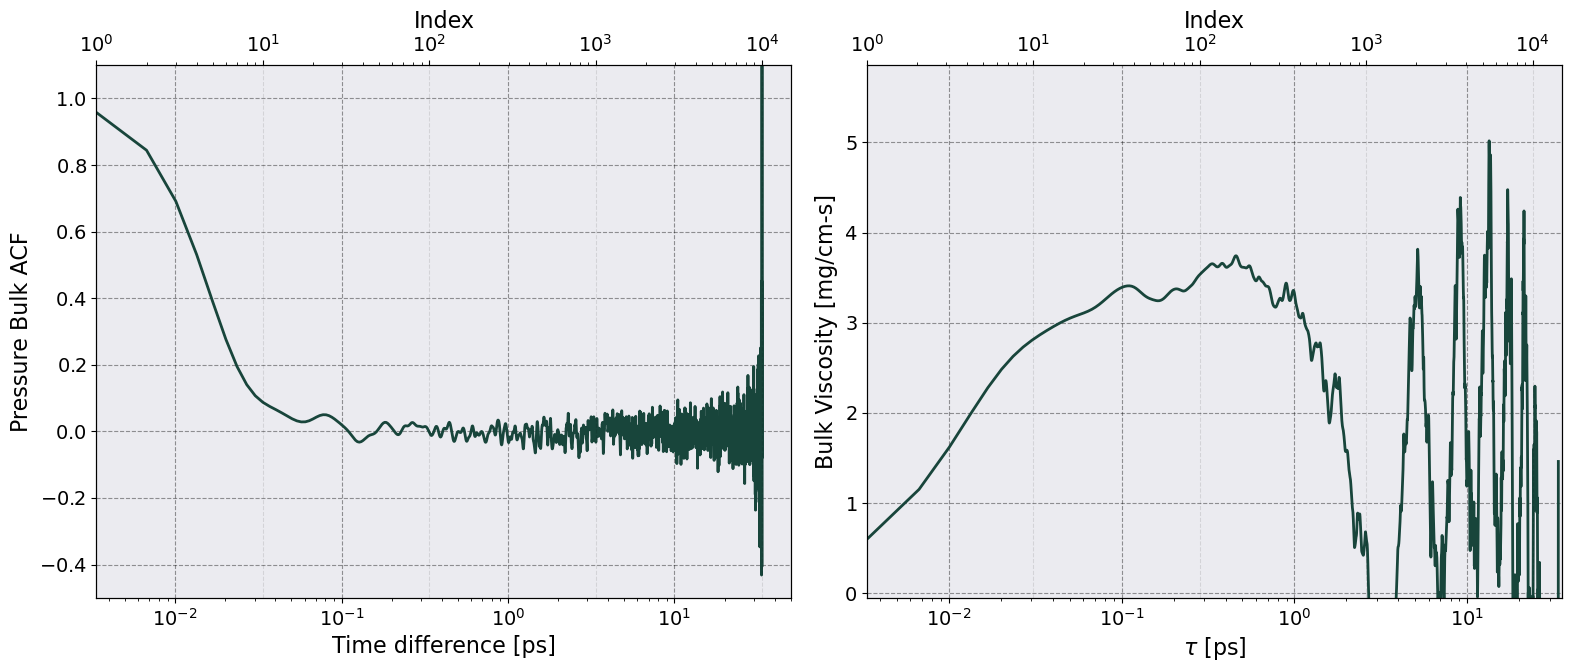

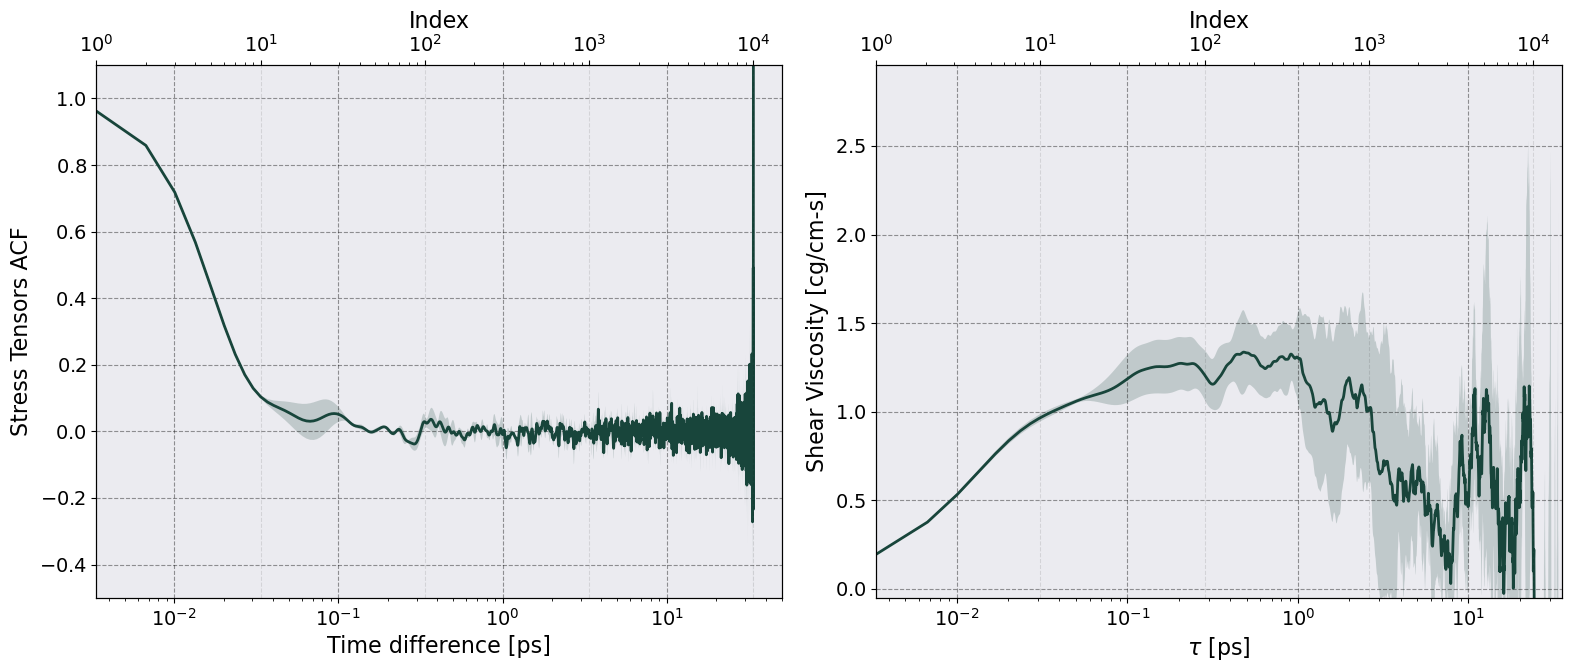

In [71]:
tc = Viscosity()
tc.setup(postproc.parameters, observable=pt, thermodynamics=therm)
tc.compute(observable = pt)
# tc.parse(observable = pt, tc_name = "Viscosities")

In [72]:
acf_str = "Delta Pressure ACF"
acf_avg = pt.dataframe_acf[("Pressure Bulk ACF", "Mean")]
acf_std = pt.dataframe_acf[("Pressure Bulk ACF", "Std")]

pq = "Bulk Viscosity"
tc_avg = tc.dataframe[(pq, "Mean")]
tc_std = tc.dataframe[(pq, "Std")]

In [73]:
tc.dataframe

Integration Bulk Viscosity     Shear Viscosity Tensor XY      \
           Interval           Mean Std                      Mean Std   
0      0.000000e+00       0.000000 NaN                  0.000000 NaN   
1      3.365115e-15       0.000600 NaN                  0.001990 NaN   
2      6.730230e-15       0.001153 NaN                  0.003839 NaN   
3      1.009534e-14       0.001623 NaN                  0.005445 NaN   
4      1.346046e-14       0.001998 NaN                  0.006761 NaN   
...             ...            ...  ..                       ...  ..   
9996   3.363769e-11       0.001191 NaN                  0.001878 NaN   
9997   3.364105e-11       0.001166 NaN                  0.001972 NaN   
9998   3.364442e-11       0.001203 NaN                  0.002050 NaN   
9999   3.364778e-11       0.001310 NaN                  0.002106 NaN   
10000  3.365115e-11       0.001462 NaN                  0.002165 NaN   

      Shear Viscosity Tensor XZ     Shear Viscosity Tensor YZ      \
                           Mean Std                      Mean Std   
0                      0.000000 NaN                  0.000000 NaN   
1                      0.001940 NaN                  0.001940 NaN   
2                      0.003739 NaN                  0.003740 NaN   
3                      0.005293 NaN                  0.005297 NaN   
4                      0.006558 NaN                  0.006566 NaN   
...                         ...  ..                       ...  ..   
9996                   0.011387 NaN                 -0.037280 NaN   
9997                   0.013416 NaN                 -0.035306 NaN   
9998                   0.015768 NaN                 -0.032486 NaN   
9999                   0.018393 NaN                 -0.028931 NaN   
10000                  0.021088 NaN                 -0.025035 NaN   

      Shear Viscosity            
                 Mean       Std  
0            0.000000  0.000000  
1            0.001957  0.000029  
2            0.003773  0.000058  
3            0.005345  0.000087  
4            0.006628  0.000115  
...               ...       ...  
9996        -0.008005  0.025795  
9997        -0.006639  0.025477  
9998        -0.004889  0.024864  
9999        -0.002810  0.024042  
10000       -0.000594  0.023185  

[10001 rows x 11 columns]

[(-1.0, 1.05)]

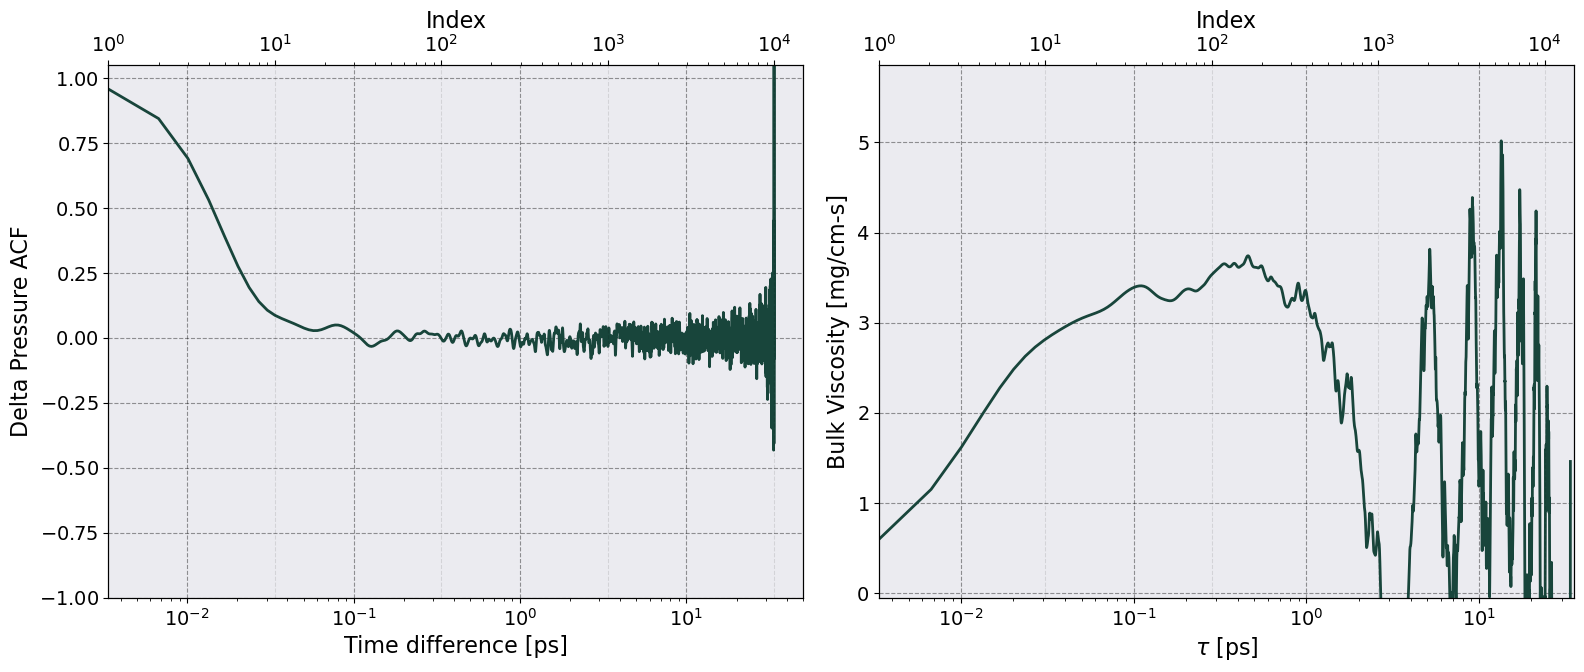

In [74]:
fig, axes = tc.plot_tc(
    time = tc.dataframe[("Integration","Interval")].to_numpy(),
    acf_data=np.column_stack((acf_avg, acf_std)),
    tc_data=np.column_stack((tc_avg, tc_std)),
    acf_name=acf_str,
    tc_name="Bulk Viscosity",
    figname="{}_Plot.png".format("Bulk Viscosity"),
    show=False
)
axes[0].set(ylim = (-1, 1.05))
# axes[1].set(ylim = (-0.5, 1000 ) )

In [75]:
def murillo_yvm(kappa, gamma):
    Ak = 0.46 *kappa**4/(1 + 0.44 * kappa**4)
    Bk = 1.01*np.exp(-0.92 * kappa)
    Ck = -3.7e-5 + 9.0e-4 * kappa - 2.9e-4*kappa**2
    
    gamma_ocp = Ak + Bk * gamma  + Ck*gamma**2
    lambda_yvm = 4.0 * np.pi/3.0 * (3.0 * gamma_ocp)**(3/2)
    I1 = 1.0/ (180 * gamma_ocp * np.pi **(3/2) )
    I2 = (0.49 - 2.23 * gamma_ocp**(-1/3) )/ (60 *np.pi**2)
    I3 = 0.241 * gamma_ocp**(1/9)/np.pi**(3/2)
    
    eta = lambda_yvm * I1 + (1 + lambda_yvm * I2)**2/(lambda_yvm * I3)
    return eta

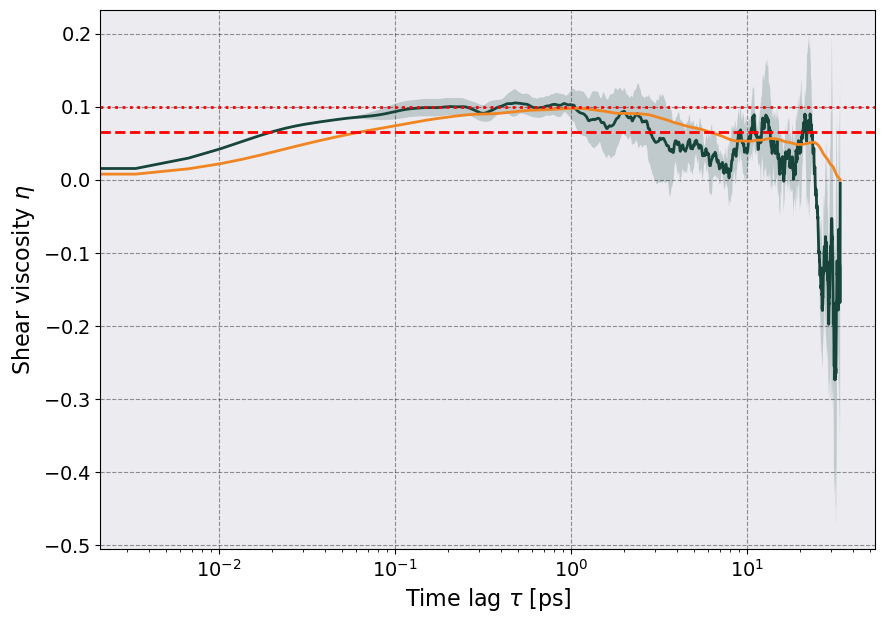

In [76]:
pq = "Shear Viscosity"
tc_avg = tc.dataframe[(pq, "Mean")]
tc_std = tc.dataframe[(pq, "Std")]

kappa = pt.a_ws/postproc.potential.screening_length
rescale = pt.total_plasma_frequency * pt.a_ws**2 * pt.species_masses[0] * pt.total_num_density
fig, ax = plt.subplots(1,1)
ax.plot(tc.dataframe[("Integration","Interval")].to_numpy()*1e12,
       tc_avg / rescale,
       label = r'$\mu$')

ax.fill_between(
    tc.dataframe[("Integration","Interval")].to_numpy()*1e12,
    (tc_avg - tc_std) / rescale,
    (tc_avg + tc_std) / rescale,
    alpha = 0.2)

ax.plot(tc.dataframe[("Integration","Interval")].to_numpy()*1e12,
       tc_avg.expanding().mean()/rescale,
       label = r'Moving avg')
ax.set(xlabel = r'Time lag $\tau$ [ps]',
      ylabel = r"Shear viscosity $\eta$",
      xscale=  'log'
      )
eta_yvm = murillo_yvm(kappa, postproc.potential.coupling_constant)
ax.axhline(0.0654, ls = '--', c = 'r', label = "Daligault MD")
ax.axhline(eta_yvm, ls = ':', c = 'r', label = "Murillo YVM")

## Thermal Conductivity

In [77]:
from sarkas.tools.observables import HeatFlux
from sarkas.tools.transport import ThermalConductivity

In [78]:
ht = HeatFlux()
ht.setup(postproc.parameters)
ht.compute(calculate_acf=True)



============================= Heat Flux ==============================
Data saved in: 
 SarkasSimulations/Al_transport/PostProcessing/HeatFlux/Production/HeatFlux_Al_transport.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of blocks = 1
No. dumps per block = 10001
Total time per block: T = 3.3651e-11 [s] ~ 1000 plasma periods
Time interval: dt = 3.3651e-15 [s] ~ 1.0e-01 plasma period

Data file not found! 
 SarkasSimulations/Al_transport/PostProcessing/HeatFlux/Production/HeatFlux_Al_transport_raw.h5



Calculating Heat Flux for slice :   0%|          | 0/1 [00:00<?, ?it/s]


Heat Flux calculation Time: 1 sec 275 msec 912 usec 459 nsec



Calculating Heat Flux ACF for slice :   0%|          | 0/1 [00:00<?, ?it/s]


Heat Flux ACF calculation Time: 0 sec 32 msec 249 usec 625 nsec


<Axes: xlabel='Plasma Periods'>

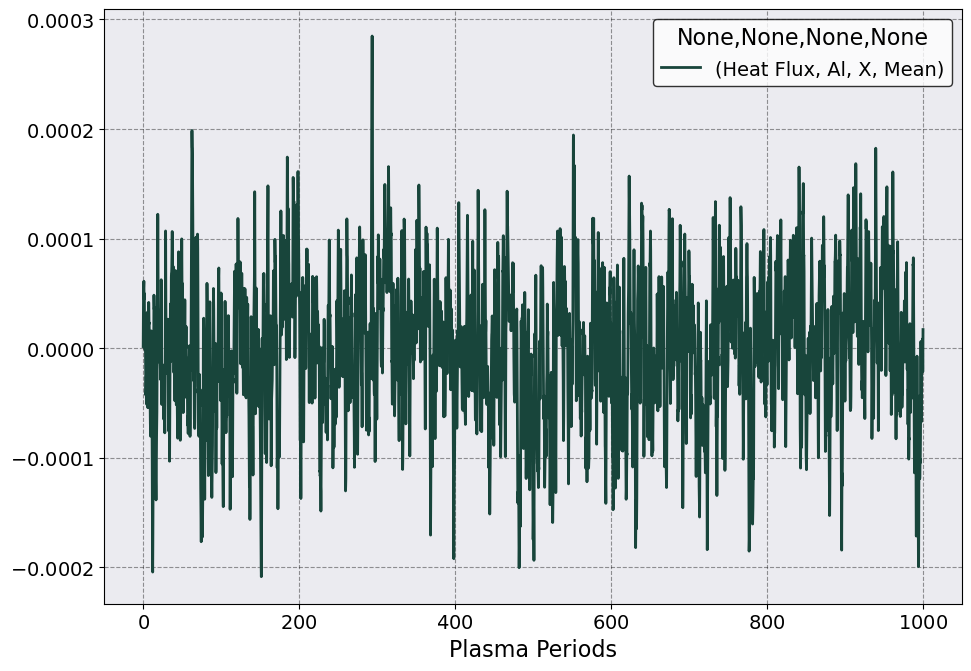

In [82]:
ht.plot(scaling = t_wp,
        y = [("Heat Flux", 'Al', 'X', "Mean"),
             # ("Heat Flux", 'Al', 'Y', "Mean"), 
             # ("Heat Flux", 'Al', 'Z', "Mean")
            ],
       xlabel = 'Plasma Periods')



======================== Thermal Conductivity ========================
Data saved in: 
 SarkasSimulations/Al_transport/PostProcessing/TransportCoefficients/ThermalConductivity/Production/ThermalConductivity_Al_transport.h5 
 SarkasSimulations/Al_transport/PostProcessing/TransportCoefficients/ThermalConductivity/Production/ThermalConductivity_slices_Al_transport.h5 
No. of slices = 1
No. dumps per block = 10001
Total time interval of autocorrelation function: tau = 3.3655e-11 [s] ~ 1000 plasma periods
Time interval step: dtau = 3.3651e-15 ~ 1.0000e-01 plasma periods


  0%|          | 0/1 [00:00<?, ?it/s]


Thermal Conductivity Calculation Time: 0 sec 9 msec 375 usec 375 nsec


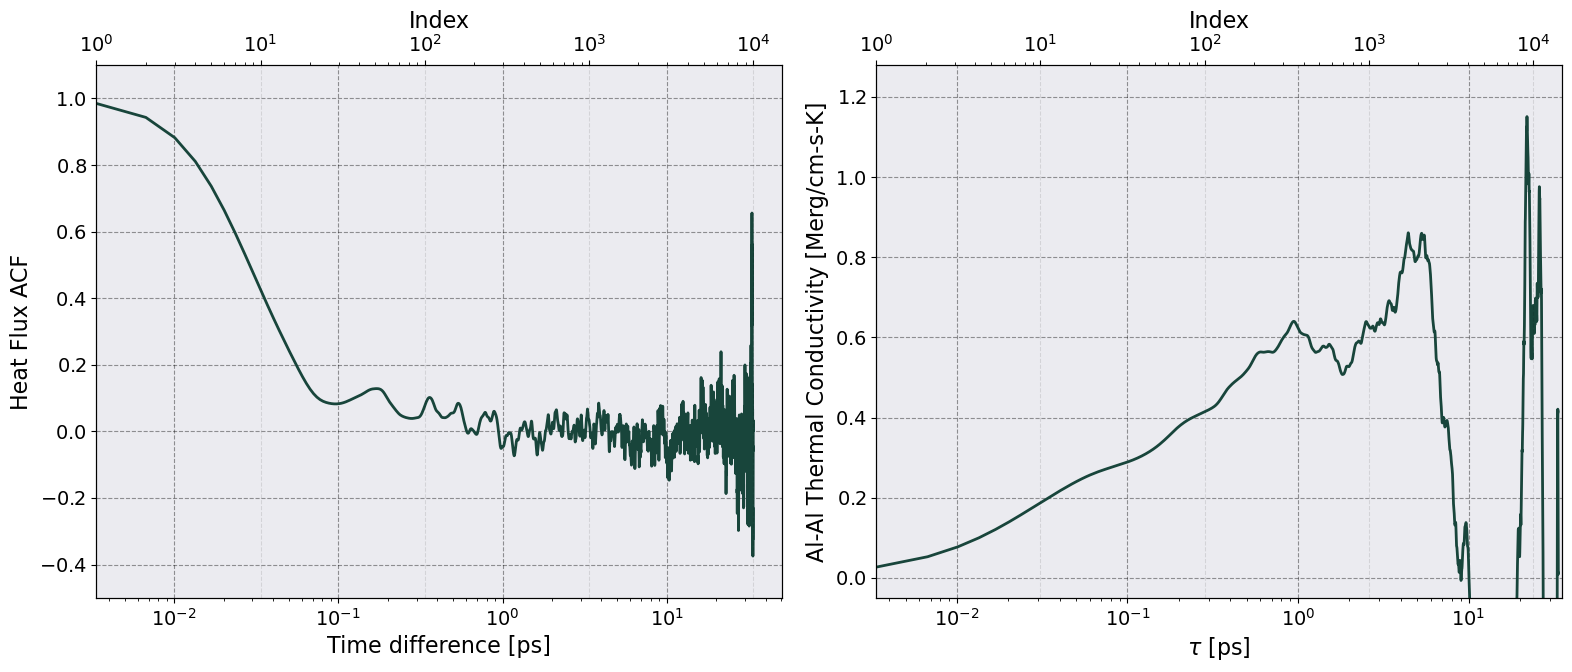

In [80]:
thc = ThermalConductivity()
thc.setup(postproc.parameters, ht, therm)
thc.compute(ht)